# Experiment result:

## test crop model on crop dataset

| test_size → | 0 | 25 | 33 | 50 | 66 | 80 | 90 | 100 | 
|-|
| 0 | 0.9213 | 0.8998 | 0.8852 | 0.8143 | 0.6226 | 0.3084 | 0.1195 | 0.0468 | 
| 25 | 0.9218 | 0.9102 | 0.9015 | 0.8537 | 0.7049 | 0.3845 | 0.1332 | 0.0468 | 
| 33 | 0.9230 | 0.9121 | 0.9033 | 0.8615 | 0.7195 | 0.3984 | 0.1289 | 0.0468 | 
| 50 | 0.9141 | 0.9069 | 0.9002 | 0.8745 | 0.7878 | 0.5278 | 0.1884 | 0.0468 | 
| 66 | 0.8971 | 0.8889 | 0.8845 | 0.8630 | 0.8050 | 0.6637 | 0.3160 | 0.0468 | 
| 80 | 0.8393 | 0.8330 | 0.8269 | 0.8108 | 0.7634 | 0.6523 | 0.4675 | 0.0468 | 
| 90 | 0.5702 | 0.5635 | 0.5561 | 0.5640 | 0.5686 | 0.5390 | 0.4223 | 0.0595 | 
| all | 0.9137 | 0.9079 | 0.8992 | 0.8657 | 0.7907 | 0.6447 | 0.4334 | 0.0595 |

## test nocrop model on crop dataset

| test_size → | 0 | 25 | 33 | 50 | 66 | 80 | 90 | 100 | 
|-|
| 0 | 0.8793 | 0.8539 | 0.8425 | 0.7736 | 0.6076 | 0.3365 | 0.1317 | 0.0468 | 
| 25 | 0.8810 | 0.8671 | 0.8573 | 0.8048 | 0.6579 | 0.3817 | 0.1597 | 0.0468 | 
| 33 | 0.8754 | 0.8675 | 0.8587 | 0.8148 | 0.6822 | 0.4204 | 0.1748 | 0.0468 | 
| 50 | 0.8669 | 0.8617 | 0.8529 | 0.8258 | 0.7218 | 0.4732 | 0.1850 | 0.0425 | 
| 66 | 0.8508 | 0.8419 | 0.8333 | 0.8133 | 0.7420 | 0.5520 | 0.2388 | 0.0425 | 
| 80 | 0.7989 | 0.7852 | 0.7760 | 0.7584 | 0.7046 | 0.5810 | 0.3249 | 0.0629 | 
| 90 | 0.6577 | 0.6492 | 0.6385 | 0.6317 | 0.5933 | 0.5170 | 0.3444 | 0.0425 | 
| all | 0.8703 | 0.8569 | 0.8487 | 0.8157 | 0.7258 | 0.5644 | 0.3342 | 0.0442 | 

## test crop model on nocrop dataset

| test_size → | 0 | 25 | 33 | 50 | 66 | 80 | 90 | 100 | 
|-|
| 0 | 0.8870 | 0.8531 | 0.8359 | 0.7476 | 0.5649 | 0.3726 | 0.2513 | 0.2020 | 
| 25 | 0.8810 | 0.8614 | 0.8493 | 0.7941 | 0.6587 | 0.4614 | 0.2993 | 0.2255 | 
| 33 | 0.8820 | 0.8598 | 0.8479 | 0.7926 | 0.6629 | 0.4670 | 0.2986 | 0.2245 | 
| 50 | 0.8805 | 0.8572 | 0.8453 | 0.7965 | 0.6906 | 0.5280 | 0.3439 | 0.2475 | 
| 66 | 0.8710 | 0.8484 | 0.8375 | 0.7896 | 0.6966 | 0.5612 | 0.4037 | 0.2770 | 
| 80 | 0.8255 | 0.8006 | 0.7885 | 0.7479 | 0.6712 | 0.5535 | 0.4227 | 0.2930 | 
| 90 | 0.5560 | 0.5431 | 0.5391 | 0.5318 | 0.5113 | 0.4597 | 0.3829 | 0.2715 | 
| all | 0.8790 | 0.8607 | 0.8480 | 0.7959 | 0.6945 | 0.5561 | 0.4151 | 0.2870 | 

## test nocrop model on nocrop dataset

| test_size → | 0 | 25 | 33 | 50 | 66 | 80 | 90 | 100 | 
|-|
| 0 | 0.9365 | 0.9149 | 0.8993 | 0.8290 | 0.6664 | 0.4645 | 0.3273 | 0.2405 | 
| 25 | 0.9320 | 0.9217 | 0.9119 | 0.8635 | 0.7282 | 0.5252 | 0.3626 | 0.2610 | 
| 33 | 0.9325 | 0.9207 | 0.9127 | 0.8716 | 0.7560 | 0.5722 | 0.3961 | 0.2810 | 
| 50 | 0.9305 | 0.9202 | 0.9133 | 0.8838 | 0.8030 | 0.6527 | 0.4642 | 0.3415 | 
| 66 | 0.9220 | 0.9107 | 0.9028 | 0.8796 | 0.8224 | 0.7125 | 0.5409 | 0.3785 | 
| 80 | 0.8820 | 0.8698 | 0.8654 | 0.8452 | 0.8032 | 0.7321 | 0.6098 | 0.4275 | 
| 90 | 0.7790 | 0.7821 | 0.7823 | 0.7716 | 0.7404 | 0.6937 | 0.6261 | 0.4930 | 
| all | 0.9310 | 0.9173 | 0.9082 | 0.8760 | 0.8063 | 0.7149 | 0.6077 | 0.4470 | 

## pre-trained on nocrop

| area | 0 | 11 | 25 | 44 | 100 |
|-------------------|--------|--------|---------|-----|-------|
| pre-trained |0.7025 | 0.5867 | 0.4272 | 0.2589 | 0.0385 | 

## aperture on aperture:

| test_size → |0 | 10 | 20 | 30 | 40 | 50 | 60 | 70 | 80 | 90 | 100 | 
|-|
| 0 | 0.0629 | 0.0557 | 0.0553 | 0.0575 | 0.0624 | 0.0643 | 0.0799 | 0.0889 | 0.0905 | 0.0815 | 0.0770 | 
| 10 | 0.0468 | 0.1907 | 0.2295 | 0.2487 | 0.2708 | 0.2995 | 0.3176 | 0.3237 | 0.3201 | 0.3115 | 0.2887 | 
| 20 | 0.0468 | 0.1449 | 0.3131 | 0.4014 | 0.4655 | 0.5336 | 0.5826 | 0.6180 | 0.6396 | 0.6462 | 0.6484 | 
| 30 | 0.0468 | 0.1027 | 0.2700 | 0.4544 | 0.5559 | 0.6355 | 0.6951 | 0.7343 | 0.7492 | 0.7627 | 0.7657 | 
| 40 | 0.0468 | 0.0873 | 0.2212 | 0.4302 | 0.5831 | 0.6761 | 0.7361 | 0.7763 | 0.7989 | 0.8169 | 0.8414 | 
| 50 | 0.0468 | 0.0741 | 0.1617 | 0.3719 | 0.5534 | 0.6867 | 0.7673 | 0.8104 | 0.8362 | 0.8523 | 0.8771 | 
| 60 | 0.0468 | 0.0670 | 0.1357 | 0.3050 | 0.4907 | 0.6623 | 0.7720 | 0.8294 | 0.8565 | 0.8718 | 0.8933 | 
| 70 | 0.0468 | 0.0667 | 0.1215 | 0.2548 | 0.4282 | 0.6157 | 0.7518 | 0.8315 | 0.8689 | 0.8855 | 0.9052 | 
| 80 | 0.0468 | 0.0637 | 0.0980 | 0.1836 | 0.3287 | 0.5303 | 0.7062 | 0.8152 | 0.8663 | 0.8937 | 0.9116 | 
| 90 | 0.0468 | 0.0580 | 0.0862 | 0.1523 | 0.2712 | 0.4566 | 0.6451 | 0.7830 | 0.8595 | 0.8967 | 0.9205 | 
| 100 | 0.0468 | 0.0609 | 0.0857 | 0.1387 | 0.2458 | 0.4050 | 0.5880 | 0.7315 | 0.8275 | 0.8825 | 0.9218 | 
| all | 0.0468 | 0.1822 | 0.2989 | 0.4347 | 0.5578 | 0.6701 | 0.7566 | 0.8190 | 0.8607 | 0.8878 | 0.9137 | 

| test_size → |0 | 20 | 40 | 60 | 80 | 100 | 
|-|
| 0 | 0.8903 | 0.7636 | 0.5549 | 0.3359 | 0.2132 | 0.1758 | 
| 20 | 0.8814 | 0.8019 | 0.6570 | 0.4457 | 0.2689 | 0.1997 | 
| 40 | 0.8526 | 0.7876 | 0.6853 | 0.5190 | 0.3254 | 0.2253 | 
| 60 | 0.7937 | 0.7325 | 0.6575 | 0.5497 | 0.3827 | 0.2585 | 
| 80 | 0.6465 | 0.6003 | 0.5507 | 0.4956 | 0.4105 | 0.2953 | 
| 100 | 0.5385 | 0.4748 | 0.4208 | 0.3721 | 0.3430 | 0.3264 | 


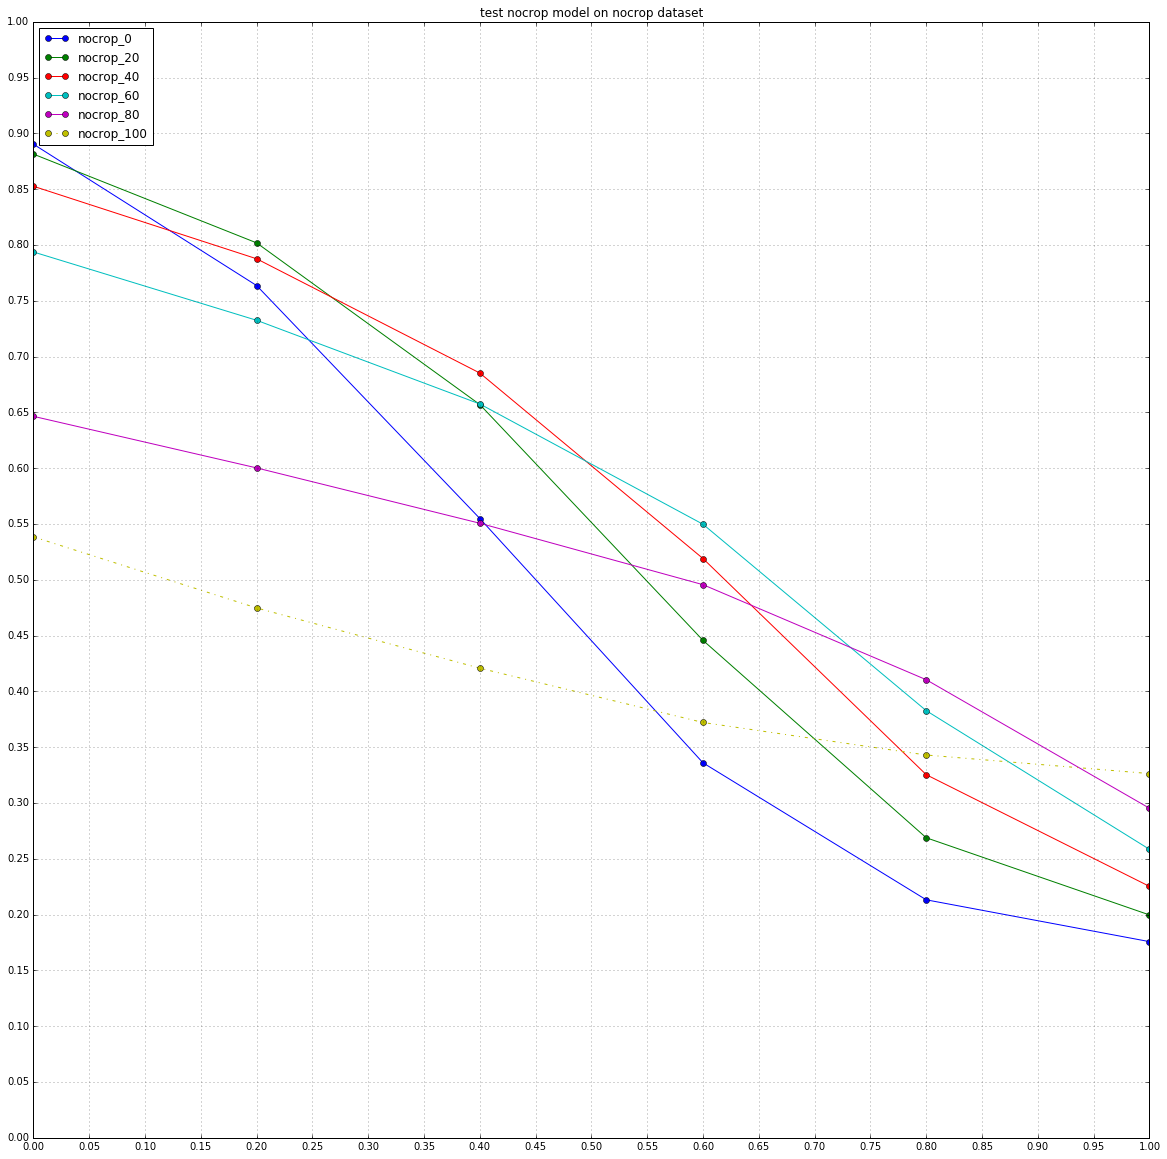

0.062925170068,0.0556500377929,0.0552721088435,0.057492441421,0.062358276644,0.0642951625094,0.0799319727891,0.0889077853364,0.0904667422525,0.0815381708239,0.0769557823129
0.046768707483,0.190665154951,0.229497354497,0.248724489796,0.270833333333,0.299461451247,0.317649281935,0.323696145125,0.320058578987,0.311460695389,0.28869047619
0.046768707483,0.144935752079,0.313114134543,0.401360544218,0.465466742252,0.533588435374,0.582577475435,0.617961073318,0.63955026455,0.646211262283,0.648384353741
0.046768707483,0.102654950869,0.269982993197,0.454412320484,0.555933484505,0.635487528345,0.695058578987,0.734268707483,0.749196900983,0.762707860922,0.765731292517
0.046768707483,0.0872543461829,0.22123015873,0.430224867725,0.58309712774,0.676067649282,0.736063869992,0.77626606198,0.798941798942,0.816893424036,0.841411564626
0.046768707483,0.0741213151927,0.161659108088,0.371882086168,0.553382464097,0.686696900983,0.767337490552,0.81037414966,0.836167800454,0.852324263039,0.87712585034
0.04676

In [3]:
# Test result visualization.
from constant import *
import sys
import numpy as np
import matplotlib.pyplot as plt
import os
import cPickle
import math
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

plt.rcParams['figure.figsize'] = (20, 20)

'''
model_type_strs = ['crop', 'nocrop']
model_names = ['0', '25', '33', '50', '66', '80', '90', 'all']
test_type_strs = ['crop', 'nocrop']
test_size = [0.0, 1.0/4, 1.0/3, 1.0/2, 2.0/3, 4.0/5, 9.0/10, 1.0]
'''

'''
model_type_strs = ['aperture']
model_names = ['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100', 'all']
test_type_strs = ['aperture']
test_size = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
'''

'''
model_type_strs = ['crop_obj', 'nocrop_obj']
model_names = ['0', '20', '40', '60', '80', '100', 'all']
test_type_strs = ['crop_obj', 'nocrop_obj']
test_size = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
'''

model_type_strs = ['nocrop']
model_names = ['0', '20', '40', '60', '80', '100']
test_type_strs = ['nocrop']
test_size = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

sq = [math.sqrt(i) for i in test_size]

def load_accuracy(model_type_str, model_name, test_type_str, test_size):
    accuracy = []
    for size in test_size:
        test_name = int(100 * size)
        with open('{}test/accuracy_{}_{}_{}_{}.pickle'.\
                  format(result_root, model_type_str, model_name, test_type_str, test_name)) as f:
            acc = cPickle.load(f)
        accuracy.append(acc)
    #with open('{}test/accuracy_{}_{}_{}.pickle'.format(result_root, model_type_str, test_type_str, model_name)) as f:
    #        accuracy = cPickle.load(f)
    return accuracy
    
test_size_sq = [i * i for i in test_size]
for test_type_str in test_type_strs:
    for model_type_str in model_type_strs:
        fig = plt.figure()
        
        # Grid.
        ax = plt.gca()
        ax.set_xlim([0, 1])
        ax.set_ylim([0, 1])
        ax.set_xticks(np.arange(0, 1.05, 0.05))                                                       
        ax.set_xticks(np.arange(0, 1.05, 0.05), minor=True)                                           
        ax.set_yticks(np.arange(0, 1.05, 0.05))                                                       
        ax.set_yticks(np.arange(0, 1.05, 0.05), minor=True)                                           
        ax.grid(which='both')                                                            
        ax.grid(which='minor', alpha=0.2)                                                
        ax.grid(which='major', alpha=0.5)   
        plt.title('test {} model on {} dataset'.format(model_type_str, test_type_str))
        
        sys.stdout.write('| test_size → |')
        for size in test_size:
            sys.stdout.write('{} | '.format(int(size * 100)))
        sys.stdout.write('\n|-|\n')
            
        for model_name in model_names:
            accuracy = load_accuracy(model_type_str, model_name, test_type_str, test_size)
                
            sys.stdout.write('| {} | '.format(model_name))
            for x in accuracy:
                sys.stdout.write('{:.4f} | '.format(x))
            sys.stdout.write('\n')
            
            if len(model_type_strs) == 2:
                if model_type_str == model_type_strs[0]:
                    plt.plot(test_size, accuracy, marker = 'o', linestyle = '-')
                else:
                    plt.plot(test_size, accuracy, marker = 'o', linestyle = '--')
                    
            if len(model_type_strs) == 1:
                if model_name == 'all':
                    plt.plot(test_size, accuracy, marker = 'o', linestyle = '--')
                elif model_name == '100':
                    plt.plot(test_size, accuracy, marker = 'o', linestyle = '-.')
                else:
                    plt.plot(test_size, accuracy, marker = 'o', linestyle = '-')
        if len(model_type_strs) == 2:         
            plt.legend([model_type_str + '_' + model_name for model_name in model_names], loc='upper right')
        else:
            plt.legend([model_type_str + '_' + model_name for model_name in model_names], loc='upper left')
        plt.show()
        fig.savefig('{}test/test_curve_{}_{}.png'.format(result_root, model_type_str, test_type_str))
    
if len(model_type_strs) == 2:
    for test_type_str in test_type_strs:
        fig = plt.figure()
        
        # Grid.
        ax = plt.gca()
        ax.set_xlim([0, 1])
        ax.set_ylim([0, 1])
        ax.set_xticks(np.arange(0, 1.05, 0.05))                                           
        ax.set_xticks(np.arange(0, 1.05, 0.05), minor=True)                                           
        ax.set_yticks(np.arange(0, 1.05, 0.05))                                           
        ax.set_yticks(np.arange(0, 1.05, 0.05), minor=True)                                           
        ax.grid(which='both')                                                            
        ax.grid(which='minor', alpha=0.2)                                                
        ax.grid(which='major', alpha=0.5)   
        plt.title('test on {}'.format(test_type_str))
        for model_type_str in model_type_strs:
            for model_name in model_names:            
                accuracy = load_accuracy(model_type_str, model_name, test_type_str, test_size)
                if model_type_str == model_type_strs[0]:
                    plt.plot(test_size, accuracy, marker = 'o', linestyle = '-')
                else:
                    plt.plot(test_size, accuracy, marker = 'o', linestyle = '--')
        plt.legend([model_type_strs[0] + '_' + model_name for model_name in model_names] + \
                   [model_type_strs[1] + '_' + model_name for model_name in model_names], loc='lower left')
        plt.show()
        fig.savefig('{}test/test_curve_{}.png'.format(result_root, test_type_str))
    
if len(model_type_strs) == 1:
    # Plot 3D surface of accuracy = f(model_size, test_size)
    test_size = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] # Y
    model_size = test_size # X
    accuracies = [[0 for i in range(11)] for j in range(11)]
    for i, size in enumerate(model_size):
        with open('{}test/accuracy_aperture_aperture_{}.pickle'.format(result_root, int(size * 100))) as f:
            accuracy = cPickle.load(f)
        accuracies[i] = accuracy
    for i in accuracies:
        for en, j in enumerate(i):
            sys.stdout.write(str(j))
            if en == len(i) - 1:
                sys.stdout.write('\n')
            else:
                sys.stdout.write(',')
                
        
        